### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Коняева Марина Александровна
##### Группа:   НФИбд-01-21

## Москва 2024
***

### Вариант № 22


1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'spambase.data'

my_data = pd.read_csv(url, sep=r',', header = None)
my_data.rename(columns=lambda x: x + 1, inplace=True)
my_data

,1,2,3,4,5,6,7,8,9,10,...,49,50,51,52,53,54,55,56,57,58
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [3]:
my_data = my_data[[55,56,58]]
my_data

,55,56,58
0,3.756,61,1
1,5.114,101,1
2,9.821,485,1
3,3.537,40,1
4,3.537,40,1
...,...,...,...
4596,1.142,3,0
4597,1.555,4,0
4598,1.404,6,0
4599,1.147,5,0


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке.

In [4]:
import warnings
warnings.filterwarnings("ignore")
print('Пропущенных значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))
    
# Пропущенных значений нет

Пропущенных значений:
	55: 0
	56: 0
	58: 0


3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало семь.

In [5]:
unique_values_count = my_data.iloc[:, 2].nunique()
unique_values_count

# в столбце, отвечающем за метку класса, не встречается более двух различных значений. объединение не требуется.

2

4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

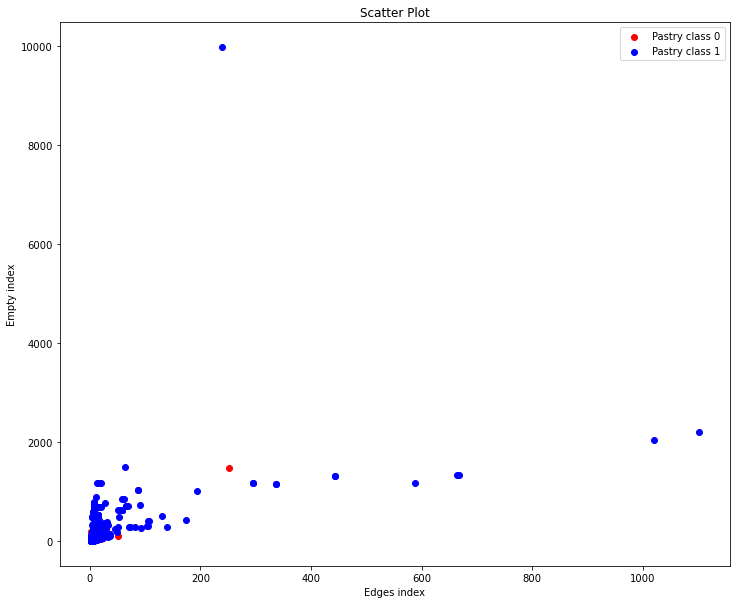

In [6]:
# признаки (столбцы 55 и 56) и метку класса (столбец 58)
features = my_data.iloc[:, [0, 1]]
labels = my_data.iloc[:, 2]

# разделяем точки по классам (выяснили 2 класса: 55 и 56 в предыдущем пункте)
class_0 = features[labels == 0]
class_1 = features[labels == 1]

# отрисовка графика
plt.figure(figsize=(12, 10))
plt.scatter(class_0.iloc[:, 0], class_0.iloc[:, 1], label='Pastry class 0', marker='o', c='red') # точки класса 55 красные
plt.scatter(class_1.iloc[:, 0], class_1.iloc[:, 1], label='Pastry class 1', marker='o', c='blue') # точки класса 56 синие

# подписи осей и рисунка
plt.xlabel('Edges index')
plt.ylabel('Empty index')
plt.title('Scatter Plot')

plt.legend()
plt.show()

5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных.

Вариант 22: Алгоритмы: K-means, Affinity Propagation, Mean Shift, mini-batch K-Means 

In [7]:
my_data2 = my_data.iloc[:, [0, 1]] # оставим 2 признака
my_data2

,55,56
0,3.756,61
1,5.114,101
2,9.821,485
3,3.537,40
4,3.537,40
...,...,...
4596,1.142,3
4597,1.555,4
4598,1.404,6
4599,1.147,5


In [8]:
def plot_cluster(X,y):
    # визуализация кластеров 
    plt.figure(figsize=(12,10))
    clusters = np.unique(y)
    for cluster in clusters:
        # индексы строк для данного кластера 
        row_ix = np.where(y == cluster)[0]
        # диаграмма рассеяния для кластера
        plt.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1],s=100)
    plt.grid(True)

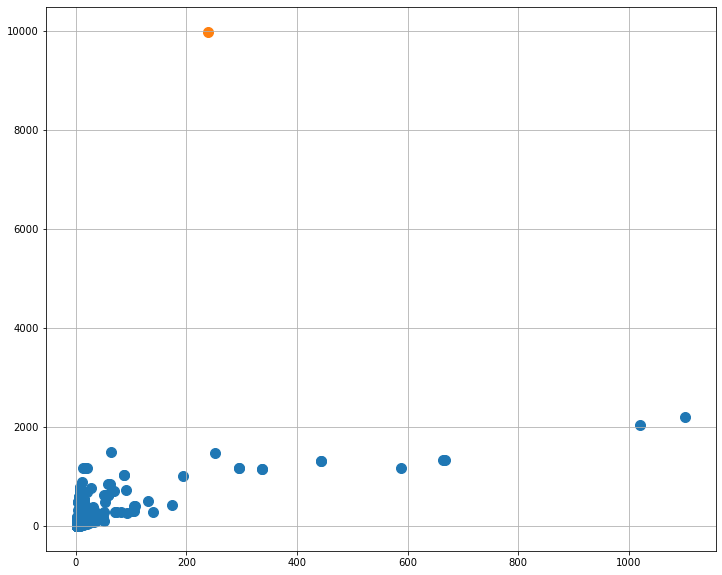

In [9]:
from sklearn.cluster import KMeans
model1 = KMeans(n_clusters=2)
model1.fit(my_data2)
yhat1 = model1.predict(my_data2)

yhat1
plot_cluster(my_data2,yhat1)

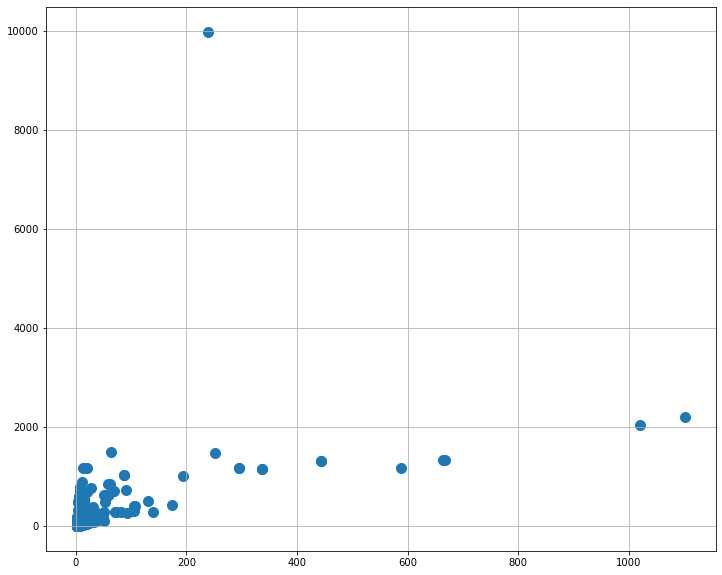

In [46]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances
similarities = -pairwise_distances(my_data2, metric='euclidean')

model2 = AffinityPropagation(damping=0.939950597, affinity='precomputed', preference=-25998)
yhat2 = model2.fit_predict(similarities)

plot_cluster(my_data2, yhat2)

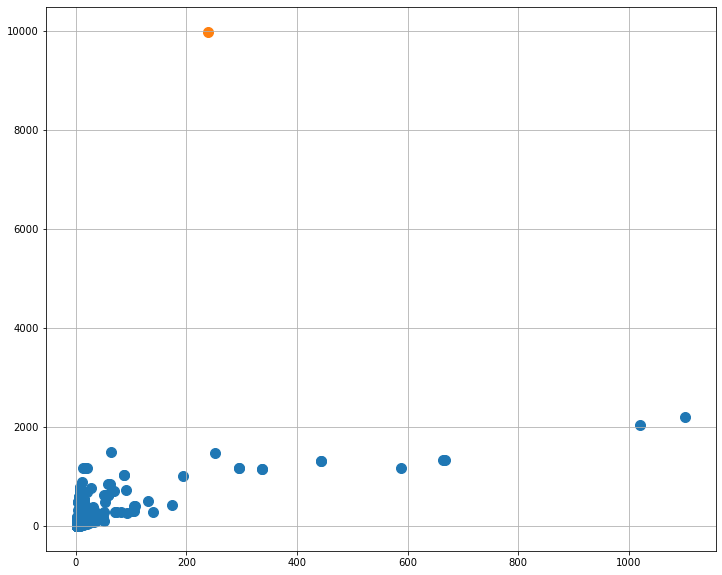

In [13]:
from sklearn.cluster import MeanShift
model3 = MeanShift(bandwidth=885) 
yhat3 = model3.fit_predict(my_data2)

yhat3
plot_cluster(my_data2, yhat3)

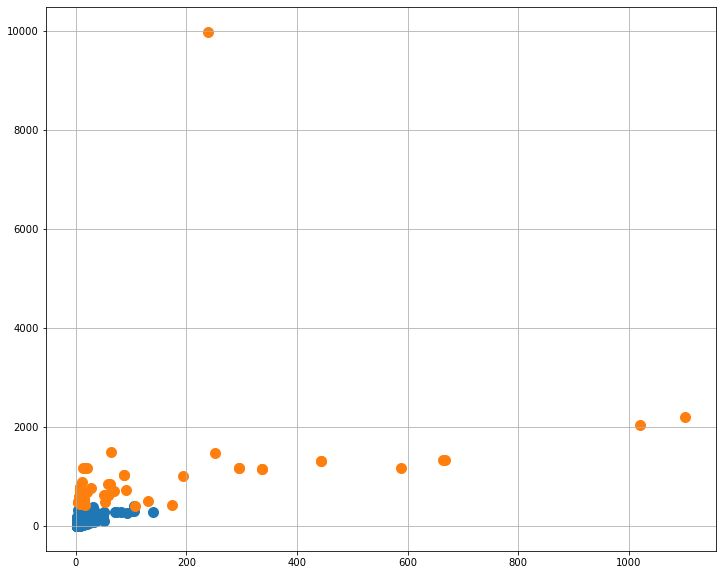

In [14]:
from sklearn.cluster import MiniBatchKMeans
model4 = MiniBatchKMeans(n_clusters=2)
model4.fit(my_data2)
yhat4 = model4.predict(my_data2)

yhat4
plot_cluster(my_data2,yhat4)

6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию contingency_matrix() из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании.

Вариант 22: Меры качества: Чистота (purity), парные меры TP, FN, FP, TN, индекс Фоулкса – Мэллоуса

In [15]:
from sklearn.metrics.cluster import contingency_matrix
import numpy as np

def calculate_purity(contingency_matrix):
    # Чистота (Purity) = (Сумма наибольших значений в строках) / (Общее количество образцов)
    return np.sum(np.amax(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

def calculate_metrics(cm):
    # TP, FN, FP, TN
    TP = np.diag(cm)
    FP = np.sum(cm, axis=0) - TP
    FN = np.sum(cm, axis=1) - TP
    TN = np.sum(cm) - (TP + FP + FN)
    return TP, FN, FP, TN

def calculate_fowlkes_mallows_index(TP, FP, FN):
    # Индекс Фоулкса-Мэллоуса
    return TP / np.sqrt((TP + FP) * (TP + FN))

# Вычислите матрицы сопряженности и меры качества для каждого алгоритма
def evaluate_clustering(y_true, y_pred):
    cm = contingency_matrix(y_true, y_pred)
    purity = calculate_purity(cm)
    TP, FN, FP, TN = calculate_metrics(cm)
    fmi = calculate_fowlkes_mallows_index(TP, FP, FN)
    return cm, purity, TP, FN, FP, TN, fmi

# Предположим, что y_true - истинные метки, а y_pred - метки, предсказанные кластеризаторами

# Для KMeans
cm_kmeans, purity_kmeans, TP_kmeans, FN_kmeans, FP_kmeans, TN_kmeans, fmi_kmeans = evaluate_clustering(labels, yhat1)

# Для MiniBatchKMeans
cm_minibatch, purity_minibatch, TP_minibatch, FN_minibatch, FP_minibatch, TN_minibatch, fmi_minibatch = evaluate_clustering(labels, yhat2)

# Для MeanShift
cm_meanshift, purity_meanshift, TP_meanshift, FN_meanshift, FP_meanshift, TN_meanshift, fmi_meanshift = evaluate_clustering(labels, yhat3)

# Для AffinityPropagation
cm_affprop, purity_affprop, TP_affprop, FN_affprop, FP_affprop, TN_affprop, fmi_affprop = evaluate_clustering(labels, yhat4)

# Вывод результатов
print("KMeans")
print("Confusion Matrix:\n", cm_kmeans)
print("Purity:", purity_kmeans)
print("TP:", TP_kmeans)
print("FN:", FN_kmeans)
print("FP:", FP_kmeans)
print("TN:", TN_kmeans)
print("Fowlkes-Mallows Index:", fmi_kmeans)

print("\nMiniBatchKMeans")
print("Confusion Matrix:\n", cm_minibatch)
print("Purity:", purity_minibatch)
print("TP:", TP_minibatch)
print("FN:", FN_minibatch)
print("FP:", FP_minibatch)
print("TN:", TN_minibatch)
print("Fowlkes-Mallows Index:", fmi_minibatch)

print("\nMeanShift")
print("Confusion Matrix:\n", cm_meanshift)
print("Purity:", purity_meanshift)
print("TP:", TP_meanshift)
print("FN:", FN_meanshift)
print("FP:", FP_meanshift)
print("TN:", TN_meanshift)
print("Fowlkes-Mallows Index:", fmi_meanshift)

print("\nAffinityPropagation")
print("Confusion Matrix:\n", cm_affprop)
print("Purity:", purity_affprop)
print("TP:", TP_affprop)
print("FN:", FN_affprop)
print("FP:", FP_affprop)
print("TN:", TN_affprop)
print("Fowlkes-Mallows Index:", fmi_affprop)

KMeans
Confusion Matrix:
 [[2788    0]
 [1812    1]]
Purity: 0.9997826559443599
TP: [2788    1]
FN: [   0 1812]
FP: [1812    0]
TN: [   1 2788]
Fowlkes-Mallows Index: [0.77851587 0.02348557]

MiniBatchKMeans
Confusion Matrix:
 [[2788]
 [1813]]
Purity: 1.0
TP: [2788]
FN: [   0 -975]
FP: [1813]
TN: [  0 975]
Fowlkes-Mallows Index: [0.77843126 0.9653121 ]

MeanShift
Confusion Matrix:
 [[2788    0]
 [1812    1]]
Purity: 0.9997826559443599
TP: [2788    1]
FN: [   0 1812]
FP: [1812    0]
TN: [   1 2788]
Fowlkes-Mallows Index: [0.77851587 0.02348557]

AffinityPropagation
Confusion Matrix:
 [[2787    1]
 [1699  114]]
Purity: 0.975005433601391
TP: [2787  114]
FN: [   1 1699]
FP: [1699    1]
TN: [ 114 2787]
Fowlkes-Mallows Index: [0.78806302 0.24966464]


7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании.

Оптимальная мера качества по варианту 22: индекс Фоулкса – Мэллоуса 

AffinityPropagation показывает наилучшие результаты по большинству метрик (чистота и индекс Фоулкса-Мэллоуса), что делает его оптимальным алгоритмом кластеризации с точки зрения указанных мер качества.

8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

In [16]:
np_my_data2 = my_data2.to_numpy()
np_my_data2

array([[  3.756,  61.   ],
       [  5.114, 101.   ],
       [  9.821, 485.   ],
       ...,
       [  1.404,   6.   ],
       [  1.147,   5.   ],
       [  1.25 ,   5.   ]])

In [24]:
# Уменьшим размер шага сетки, иначе невозможно разместить в памяти такой обьем
h = 0.5  # точка в сетке [x_min, x_max]x[y_min, y_max].

x_min, x_max = np_my_data2[:, 0].min(), np_my_data2[:, 0].max()
y_min, y_max = np_my_data2[:, 1].min(), np_my_data2[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model4.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [25]:
Z.shape

(19976, 2203)

In [26]:
my_data2[0] = model4.labels_

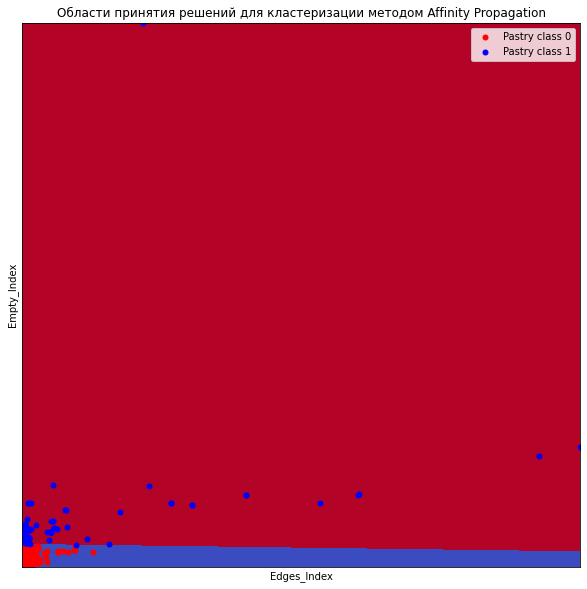

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.coolwarm, 
    aspect="auto",
    origin="lower",
)

colors = ["ro", "bo"]

for i in np.sort(my_data2[0].unique()):
  classes = my_data2.loc[my_data2[0] == i]
  plt.plot(classes[55], classes[56], colors[i],markersize=5, label=str(i))

plt.title("Области принятия решений для кластеризации методом Affinity Propagation")
plt.xlabel("Edges_Index")
plt.ylabel("Empty_Index")
plt.legend(labels=["Pastry class 0", "Pastry class 1"])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(());